In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("tech_team_train.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
...,...,...,...,...,...,...,...,...
199995,19930,170,1953,-1,2011-05-12 10:29:00,1.65,14606.0,35
199996,9942,2075,3500,6,2011-07-27 14:21:00,2.08,12397.0,3
199997,15999,856,318,2,2011-11-11 10:49:00,3.75,17295.0,35
199998,3833,441,2424,1,2011-03-11 13:03:00,0.85,15311.0,35


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    200000 non-null  int64  
 1   StockCode    200000 non-null  int64  
 2   Description  200000 non-null  int64  
 3   Quantity     200000 non-null  int64  
 4   InvoiceDate  200000 non-null  object 
 5   UnitPrice    200000 non-null  float64
 6   CustomerID   200000 non-null  float64
 7   Country      200000 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 12.2+ MB


In [4]:
df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,9952.735820,1573.893530,2024.197385,11.995500,3.454349,15287.588765,32.827520
std,5550.353986,843.903114,1090.339870,250.783212,90.082500,1715.369101,6.737939
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5066.000000,937.000000,1141.000000,2.000000,1.250000,13949.000000,35.000000
50%,10299.000000,1524.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14648.000000,2106.000000,2948.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,74215.000000,38970.000000,18287.000000,36.000000


In [5]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
...,...,...,...,...,...,...,...,...
199995,19930,170,1953,-1,2011-05-12 10:29:00,1.65,14606.0,35
199996,9942,2075,3500,6,2011-07-27 14:21:00,2.08,12397.0,3
199997,15999,856,318,2,2011-11-11 10:49:00,3.75,17295.0,35
199998,3833,441,2424,1,2011-03-11 13:03:00,0.85,15311.0,35


In [7]:
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['date'] = df['InvoiceDate'].dt.date
df['hour'] = df['InvoiceDate'].dt.hour
df['minute'] = df['InvoiceDate'].dt.minute

In [9]:
df['day']=df['InvoiceDate'].dt.dayofweek

In [10]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,hour,minute,day
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,2011,5,2011-05-06,16,54,4
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2011,5,2011-05-11,7,35,2
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,2011,11,2011-11-20,13,20,6
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,2011,11,2011-11-22,12,7,1
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,2011,5,2011-05-06,9,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,19930,170,1953,-1,2011-05-12 10:29:00,1.65,14606.0,35,2011,5,2011-05-12,10,29,3
199996,9942,2075,3500,6,2011-07-27 14:21:00,2.08,12397.0,3,2011,7,2011-07-27,14,21,2
199997,15999,856,318,2,2011-11-11 10:49:00,3.75,17295.0,35,2011,11,2011-11-11,10,49,4
199998,3833,441,2424,1,2011-03-11 13:03:00,0.85,15311.0,35,2011,3,2011-03-11,13,3,4


In [22]:
df_months = df.groupby(['year','month'],as_index=False)['InvoiceNo'].count()
df_months

,year,month,InvoiceNo
0,2010,12,13166
1,2011,1,10739
2,2011,2,9928
3,2011,3,13728
4,2011,4,11345
5,2011,5,14331
6,2011,6,13686
7,2011,7,13641
8,2011,8,13549
9,2011,9,20049


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

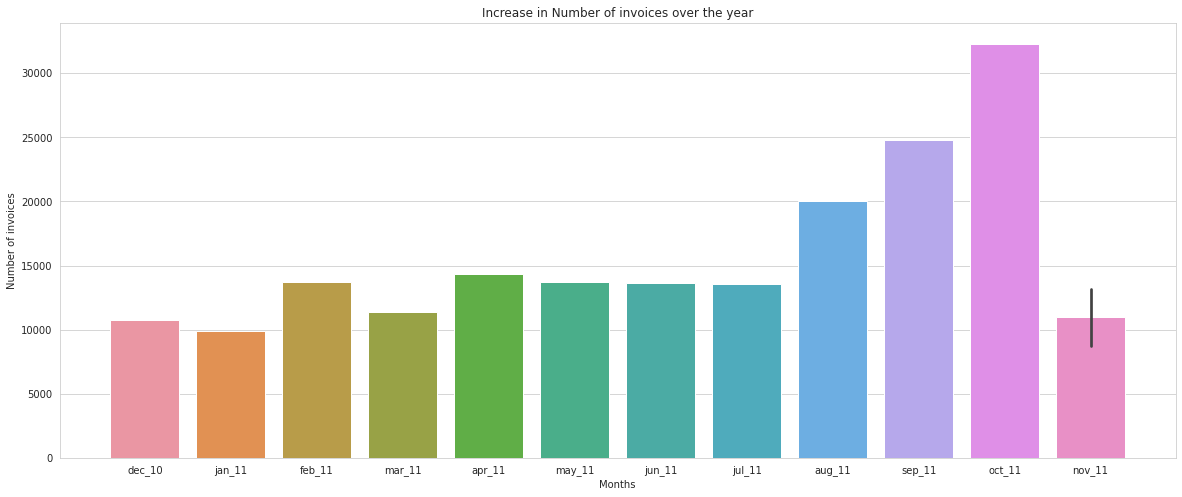

In [45]:
plt.figure(figsize=(20,8))
sns.barplot(df_months['month'],df_months['InvoiceNo'])
pos=[0,1,2,3,4,5,6,7,8,9,10,11]
label=['dec_10','jan_11','feb_11','mar_11','apr_11','may_11','jun_11','jul_11','aug_11','sep_11','oct_11','nov_11','dec_11']
plt.ylabel('Number of invoices')
plt.xlabel('Months')
plt.title('Increase in Number of invoices over the year')
plt.xticks(pos,label)
plt.plot()

# From this chart we can clearly see the the number of invoices have beem increasing gradually over the year and it was at its peak during nov-2011
We do not consider the last month because we have insufficient data

In [33]:
df_days = df.groupby(['day'],as_index=False)['InvoiceNo'].count()
df_days

,day,InvoiceNo
0,0,32543
1,1,33447
2,2,34847
3,3,40511
4,4,27672
5,6,30980


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

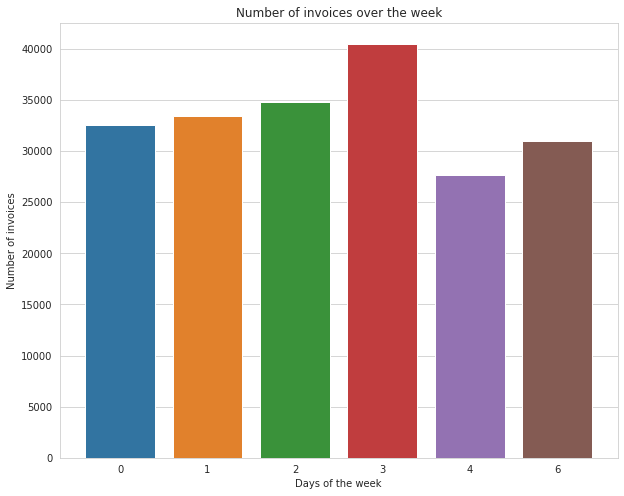

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(df_days['day'],df_days['InvoiceNo'])
pos=[0,1,2,3,4,5,6]
label=['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday']
plt.ylabel('Number of invoices')
plt.xlabel('Days of the week')
plt.title('Number of invoices over the week')
plt.xticks(df_days.index,df_days['day'])
plt.plot()

# From this bar chart we can make out that the number of invoices increase just a little everyday till thursday and then they fall down over the weekend.
We also notice that there are no invoices on saturday so wwe assume that might be a non working day

In [36]:
df_hours = df.groupby(['hour'],as_index=False)['InvoiceNo'].count()
df_hours

,hour,InvoiceNo
0,6,23
1,7,198
2,8,4417
3,9,11143
4,10,19246
5,11,24674
6,12,36029
7,13,32066
8,14,26881
9,15,22505


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

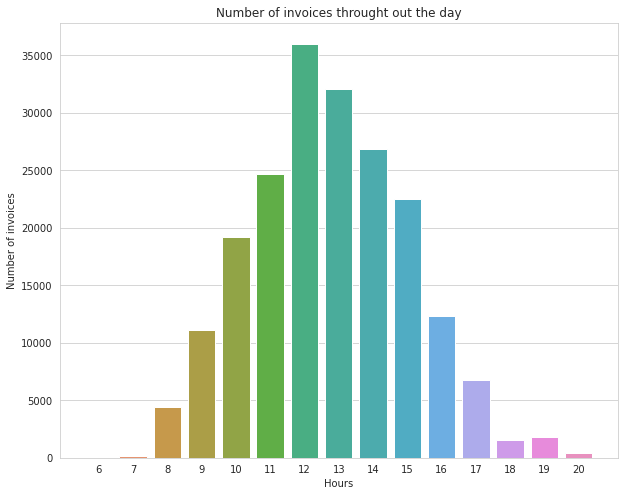

In [43]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(df_hours['hour'],df_hours['InvoiceNo'])
# pos=[0,1,2,3,4,5,6]
# label=['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday']
plt.ylabel('Number of invoices')
plt.xlabel('Hours')
plt.title('Number of invoices throught out the day')
plt.xticks(df_hours.index,df_hours['hour'])
plt.plot()

# This makes it very evident that during the afternoon specifically the lunch hours is when most of the invoices are recieved
And there are no transactions from 8pm to 6am

In [62]:
# df['StockCode'].value_counts()
df_country = df.groupby(['Country','StockCode']).agg({'Quantity':sum})
df_country_final = df_country['Quantity'].groupby('Country', group_keys=False).nlargest(1)

In [67]:
df_country_final = df_country_final.drop(index=35)

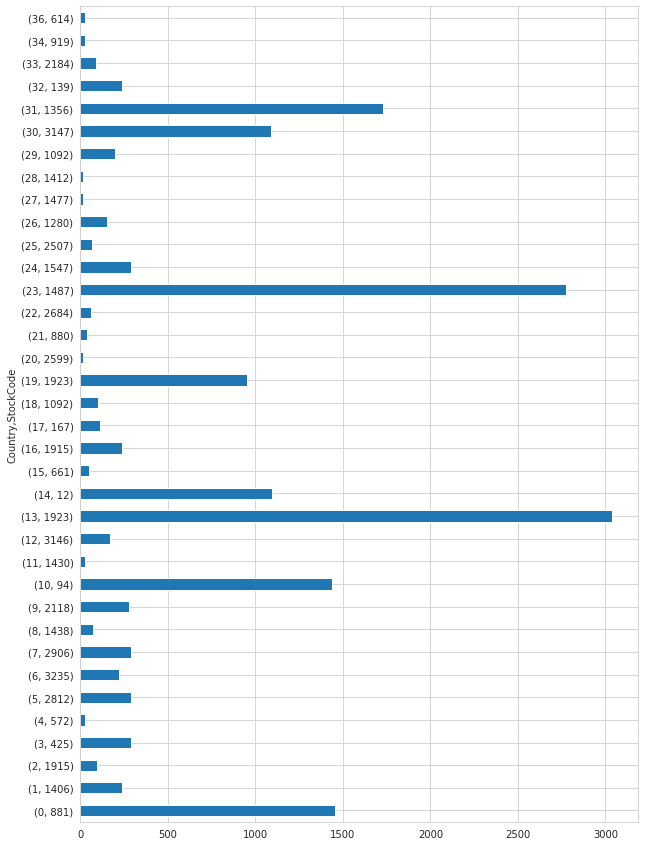

In [70]:
plt.figure(figsize=[10,15])
df_country_final.plot(kind='barh')

# This chart shows us the StockCode with highest Quantity buy-ins for each Country. So we can figure out what is in demand in which country
(Excluded Country 35 because it had a extremely huge value , an outlier)

<Figure size 1440x2016 with 0 Axes>

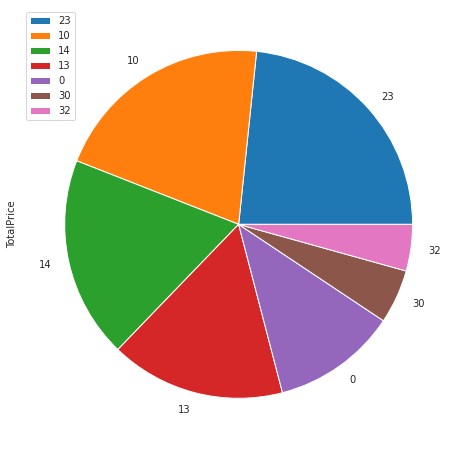

In [90]:
plt.figure(figsize=[20,28])
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
df_cc = df.groupby(['Country'],as_index=False)['TotalPrice'].sum()
df_cc = df_cc.drop(index=35)
df_cc = df_cc.sort_values(['TotalPrice'],ascending=False)
df_cc.head(7).plot(kind='pie',x='Country',y='TotalPrice', figsize=(8,8))

# This pie chart shows us the 7 top countries that have highest investment 
(Excluding country 35 again becuase of huge value)

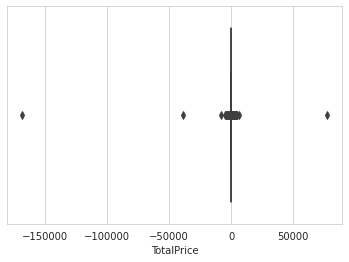

In [93]:
sns.boxplot(x=df['TotalPrice'])

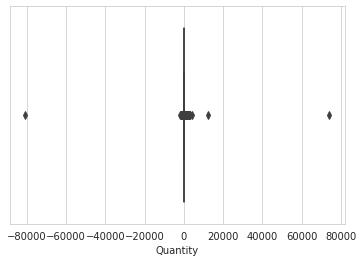

In [94]:
sns.boxplot(x=df['Quantity'])

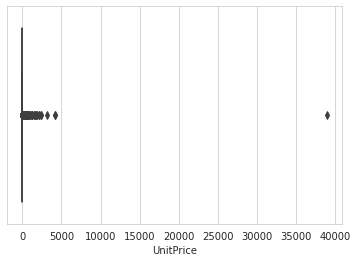

In [95]:
sns.boxplot(x=df['UnitPrice'])

# From all three of these Boxplots we come to know that most of the instances lie in the proper range but there are a few extreme outliers 

In [104]:
df_new = df[['UnitPrice','TotalPrice','Quantity']]
outliers = {}
for col in df_new:
  lower_lim = df_new[col].quantile(q=0.01)
  upper_lim = df_new[col].quantile(q=0.99)
  outliers[col] = len(df_new[col][(df_new[col]>upper_lim) | (df_new[col] < lower_lim)])

In [105]:
outliers_hardedge = pd.DataFrame(outliers.items(),columns=['Feature','Outliers'])
outliers_hardedge

,Feature,Outliers
0,UnitPrice,3418
1,TotalPrice,3996
2,Quantity,3679


# After this we can see that there are a few outliers so if we can exclude they to show some correlation within the data 
(They seem to be correct values , not some mistake made while collecting the data but those outliers would deflect the results

# Removing data based on interquartile range to make better predictions

In [138]:
dff = df[df['TotalPrice']<=20]
dff = dff[dff['TotalPrice']>=0]
dff = dff[dff['UnitPrice']<=4]
dff = dff[dff['UnitPrice']>0]

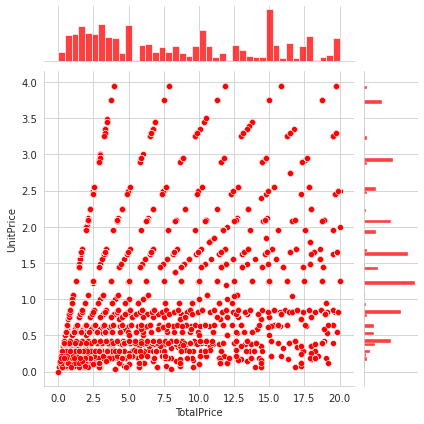

In [142]:
sns.jointplot(x='TotalPrice',y='UnitPrice',data=dff,color='red');

# This shows us a little trend of how Unit price increases with Total price all though it is not very prominent .

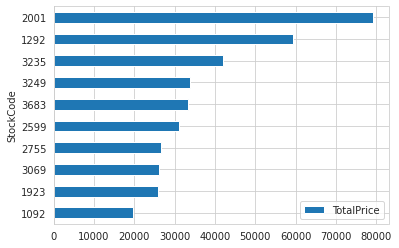

In [148]:
df_stocks = df.groupby(['StockCode']).agg({'TotalPrice':sum})
df_stocks = df_stocks.sort_values(['TotalPrice'],ascending=False)
df_stocks.head(10).plot(kind='barh').invert_yaxis()

# The top 10 StockCode in which Customers like to Invest their money

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

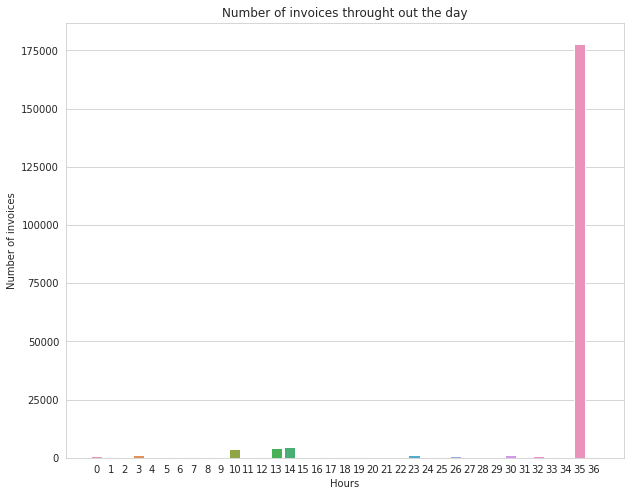

In [150]:
df_cccc = df.groupby(['Country'],as_index=False)['InvoiceNo'].count()
plt.figure(figsize=(10,8))
sns.barplot(df_cccc['Country'],df_cccc['InvoiceNo'])
# pos=[0,1,2,3,4,5,6]
# label=['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday']
plt.ylabel('Number of invoices')
plt.xlabel('Countries')
plt.title('Number of invoices From various countries')
plt.xticks(df_cccc.index,df_cccc['Country'])
plt.plot()

Country No 35 again has a lot of invoices so we will exclude that to compare the other countries

In [153]:
df_cccc = df_cccc.drop(index=35)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

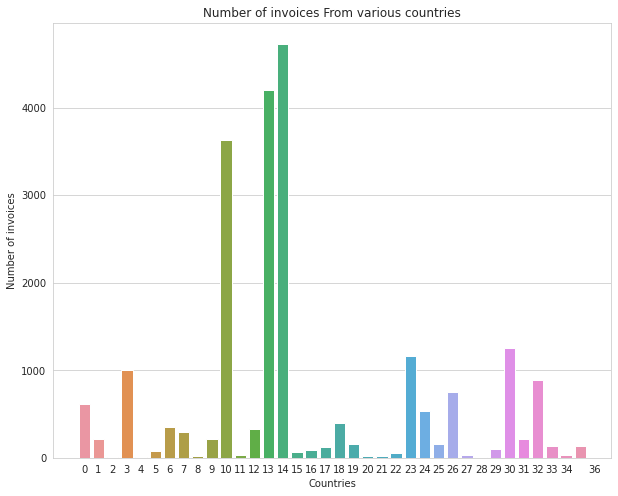

In [154]:
plt.figure(figsize=(10,8))
sns.barplot(df_cccc['Country'],df_cccc['InvoiceNo'])
# pos=[0,1,2,3,4,5,6]
# label=['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday']
plt.ylabel('Number of invoices')
plt.xlabel('Countries')
plt.title('Number of invoices From various countries')
plt.xticks(df_cccc.index,df_cccc['Country'])
plt.plot()

# This shows us which country has sent how many invoices and so we can know which country has invested more

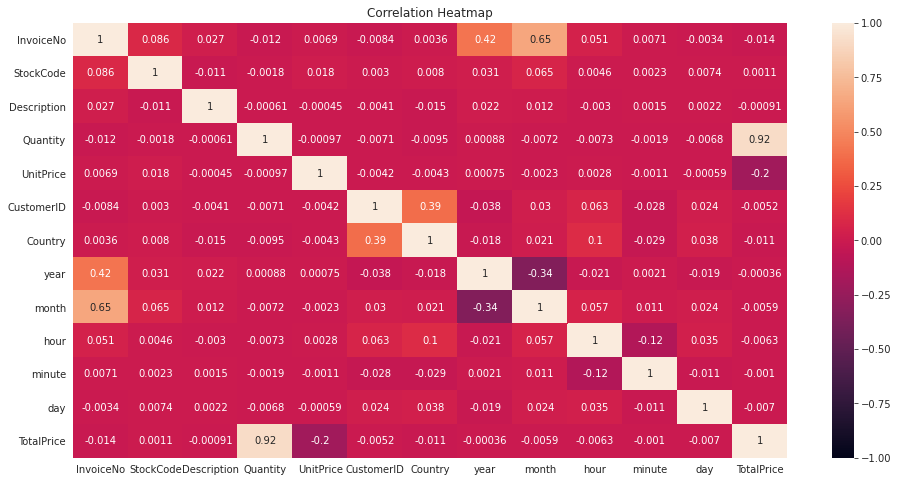

In [119]:
plt.figure(figsize=(16,8))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)


In [135]:
df.describe(
)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,year,month,hour,minute,day,TotalPrice
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.00000,200000.000000
mean,9952.735820,1573.893530,2024.197385,11.995500,3.454349,15287.588765,32.827520,2010.934170,7.60704,12.730595,30.439405,2.60621,19.617183
std,5550.353986,843.903114,1090.339870,250.783212,90.082500,1715.369101,6.737939,0.247985,3.41709,2.291133,17.071180,1.91964,430.445333
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000,2010.000000,1.00000,6.000000,0.000000,0.00000,-168469.600000
25%,5066.000000,937.000000,1141.000000,2.000000,1.250000,13949.000000,35.000000,2011.000000,5.00000,11.000000,16.000000,1.00000,4.200000
50%,10299.000000,1524.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000,2011.000000,8.00000,13.000000,31.000000,2.00000,11.250000
75%,14648.000000,2106.000000,2948.000000,12.000000,3.750000,16794.000000,35.000000,2011.000000,11.00000,14.000000,45.000000,4.00000,19.500000
max,22188.000000,3683.000000,3895.000000,74215.000000,38970.000000,18287.000000,36.000000,2011.000000,12.00000,20.000000,59.000000,6.00000,77183.600000
